# Part 1
Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

# Importing Dataset

In [2]:
df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# 1. Data cleaning and transformation:

### A. Shape of the DataFrame

In [4]:
df.shape

(101766, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

By seeing suspicious values i.e. '?'.
We need to replace it with NaN

In [7]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

#### Replacing '?' with NaN

In [8]:
df.replace({'?': np.nan}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### B. Dropping the features having more than 50%  of NaN values

Observation:
1. Only Feature 'weight' has most of the missing values

In [10]:
df.drop('weight', axis=1, inplace=True)

#### Duplicate Value Handling
1. Finding the duplicate values in all the columns.
2. Dropping the columns having more than 95% duplicate values.

In [11]:
for columns in df.columns:
    print("Column name: ",columns,"\n Duplicate Percentage",df[columns].duplicated().mean()*100,"%","\n")
#     df['readmitted'].duplicated().sum()

Column name:  encounter_id 
 Duplicate Percentage 0.0 % 

Column name:  patient_nbr 
 Duplicate Percentage 29.723090226598277 % 

Column name:  race 
 Duplicate Percentage 99.99410412121927 % 

Column name:  gender 
 Duplicate Percentage 99.99705206060963 % 

Column name:  age 
 Duplicate Percentage 99.99017353536544 % 

Column name:  admission_type_id 
 Duplicate Percentage 99.99213882829235 % 

Column name:  discharge_disposition_id 
 Duplicate Percentage 99.97445119195017 % 

Column name:  admission_source_id 
 Duplicate Percentage 99.98329501012125 % 

Column name:  time_in_hospital 
 Duplicate Percentage 99.98624294951163 % 

Column name:  payer_code 
 Duplicate Percentage 99.9823123636578 % 

Column name:  medical_specialty 
 Duplicate Percentage 99.92826680816775 % 

Column name:  num_lab_procedures 
 Duplicate Percentage 99.88404771731226 % 

Column name:  num_procedures 
 Duplicate Percentage 99.99312147475581 % 

Column name:  num_medications 
 Duplicate Percentage 99.9263015

Converting the values of 'readmitted' column into 0 for 'NO' and 1 for '<30' and '>30'

In [12]:
df['readmitted']=df['readmitted'].replace({'NO':0, '<30':1, '>30':1})

In [13]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [14]:
corr_matrix=df.corr()
corr_matrix['readmitted'].sort_values(ascending=False)

readmitted                  1.000000
number_inpatient            0.217194
number_diagnoses            0.112564
number_emergency            0.103011
number_outpatient           0.082142
patient_nbr                 0.074093
time_in_hospital            0.051289
num_medications             0.046772
admission_source_id         0.039986
num_lab_procedures          0.039253
admission_type_id          -0.004923
discharge_disposition_id   -0.014852
encounter_id               -0.038267
num_procedures             -0.044748
Name: readmitted, dtype: float64

Converting All Possible No and Yes values to 0 and 1 respectively.

In [15]:
df=df.replace({'No':0, 'Yes':1})

In [16]:
corr_matrix=df.corr()
corr_matrix['readmitted'].sort_values(ascending=False)

readmitted                  1.000000
number_inpatient            0.217194
number_diagnoses            0.112564
number_emergency            0.103011
number_outpatient           0.082142
patient_nbr                 0.074093
diabetesMed                 0.061508
time_in_hospital            0.051289
num_medications             0.046772
admission_source_id         0.039986
num_lab_procedures          0.039253
admission_type_id          -0.004923
discharge_disposition_id   -0.014852
encounter_id               -0.038267
num_procedures             -0.044748
examide                          NaN
citoglipton                      NaN
Name: readmitted, dtype: float64

Unnecessary Columns

In [17]:
Unnecessary_Cols=['discharge_disposition_id','admission_type_id','admission_source_id','examide','citoglipton','metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone','glipizide-metformin','glyburide-metformin','tolazamide','troglitazone','miglitol','acarbose','rosiglitazone','pioglitazone','tolbutamide','glyburide','glipizide','acetohexamide','glimepiride','chlorpropamide','nateglinide','repaglinide','metformin','A1Cresult','max_glu_serum','payer_code','medical_specialty','insulin',] 

In [18]:
df=df.drop(df[Unnecessary_Cols],axis=1)

In [19]:
df

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,0,250.83,NaN,NaN,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,Ch,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,0,1,0
3,500364,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,Ch,1,0
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,Ch,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,250.13,291,458,9,Ch,1,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,560,276,787,9,0,1,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,53,0,9,1,0,0,38,590,296,13,Ch,1,0
101764,443857166,31693671,Caucasian,Female,[80-90),10,45,2,21,0,0,1,996,285,998,9,Ch,1,0


### C. Transforming the 'age' to be the middle values in each range

In [20]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Converting the age to the middle value

In [21]:
df['age']=df['age'].replace({'[70-80)':75, '[60-70)':65, '[50-60)':55, '[80-90)':85, '[40-50)':45, '[30-40)':35, '[90-100)':95, '[20-30)':25, '[10-20)':15, '[0-10)':5})

In [22]:
df.age.value_counts()

75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

### D. Replacing possible missing values in columns diag_1, diag_2, and diag_3 by the number 0

In [23]:
df.diag_1.isna().sum()

21

In [24]:
df.diag_2.isna().sum()

358

In [25]:
df.diag_3.isna().sum()

1423

In [26]:
diag_cols=['diag_1','diag_2','diag_3']
df[diag_cols]=df[diag_cols].fillna(0)

In [27]:
df.diag_1.isna().sum()

0

In [28]:
df.diag_2.isna().sum()

0

In [29]:
df.diag_3.isna().sum()

0

### E. Droping all rows with missing values

In [30]:
df.isna().sum()

encounter_id             0
patient_nbr              0
race                  2273
gender                   0
age                      0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
diag_1                   0
diag_2                   0
diag_3                   0
number_diagnoses         0
change                   0
diabetesMed              0
readmitted               0
dtype: int64

In [31]:
df=df.dropna()

In [32]:
df.isna().sum()

encounter_id          0
patient_nbr           0
race                  0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
change                0
diabetesMed           0
readmitted            0
dtype: int64

### F. Identifying numerical and categorical Features

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   encounter_id        99493 non-null  int64 
 1   patient_nbr         99493 non-null  int64 
 2   race                99493 non-null  object
 3   gender              99493 non-null  object
 4   age                 99493 non-null  int64 
 5   time_in_hospital    99493 non-null  int64 
 6   num_lab_procedures  99493 non-null  int64 
 7   num_procedures      99493 non-null  int64 
 8   num_medications     99493 non-null  int64 
 9   number_outpatient   99493 non-null  int64 
 10  number_emergency    99493 non-null  int64 
 11  number_inpatient    99493 non-null  int64 
 12  diag_1              99493 non-null  object
 13  diag_2              99493 non-null  object
 14  diag_3              99493 non-null  object
 15  number_diagnoses    99493 non-null  int64 
 16  change              9

Creating separate list of categorical and numerical variables

Categorical features

In [34]:
cat_feature=df.select_dtypes(include=['object']).copy()

In [35]:
cat_feature

,race,gender,diag_1,diag_2,diag_3,change
0,Caucasian,Female,250.83,0,0,0
1,Caucasian,Female,276,250.01,255,Ch
2,AfricanAmerican,Female,648,250,V27,0
3,Caucasian,Male,8,250.43,403,Ch
4,Caucasian,Male,197,157,250,Ch
...,...,...,...,...,...,...
101761,AfricanAmerican,Male,250.13,291,458,Ch
101762,AfricanAmerican,Female,560,276,787,0
101763,Caucasian,Male,38,590,296,Ch
101764,Caucasian,Female,996,285,998,Ch


In [36]:
cat_list=[columns for columns in cat_feature]

In [37]:
cat_list

['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'change']

Numerical Features

In [38]:
num_features=df.select_dtypes(exclude=['object']).copy()

In [39]:
num_features

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,2278392,8222157,5,1,41,0,1,0,0,0,1,0,0
1,149190,55629189,15,3,59,0,18,0,0,0,9,1,1
2,64410,86047875,25,2,11,5,13,2,0,1,6,1,0
3,500364,82442376,35,2,44,1,16,0,0,0,7,1,0
4,16680,42519267,45,1,51,0,8,0,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,75,3,51,0,16,0,0,0,9,1,1
101762,443847782,74694222,85,5,33,3,18,0,0,1,9,1,0
101763,443854148,41088789,75,1,53,0,9,1,0,0,13,1,0
101764,443857166,31693671,85,10,45,2,21,0,0,1,9,1,0


In [40]:
num_list=[columns for columns in num_features]

In [41]:
num_list

['encounter_id',
 'patient_nbr',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'diabetesMed',
 'readmitted']

### G. Identifying Outliers in numerical columns and removing them.

Detecting outliers using BoxPlot

In [42]:
def plot_boxplot(df, feat):
    df.boxplot(column=[feat])
    plt.title(feat)
    plt.grid(False)
    plt.show()

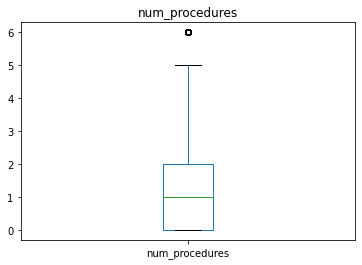

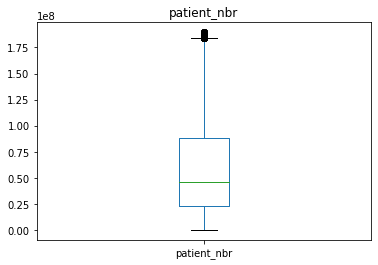

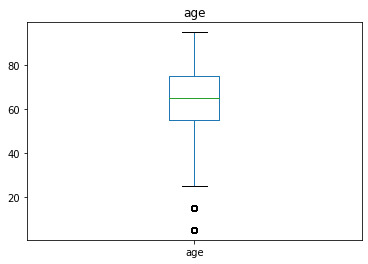

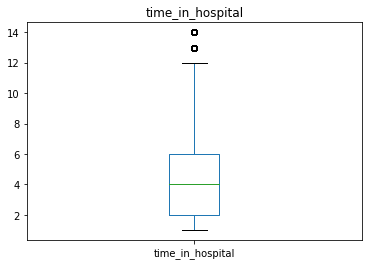

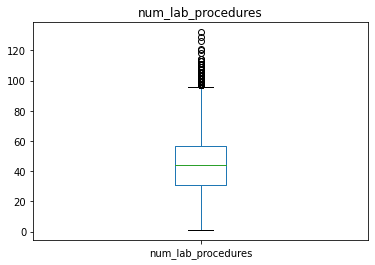

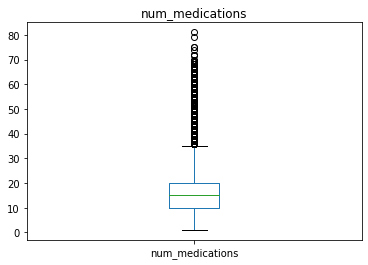

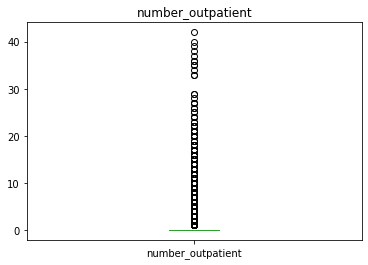

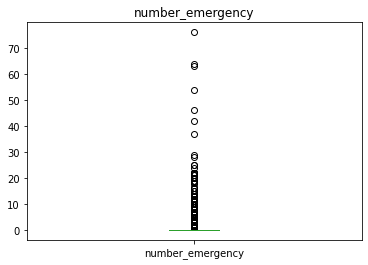

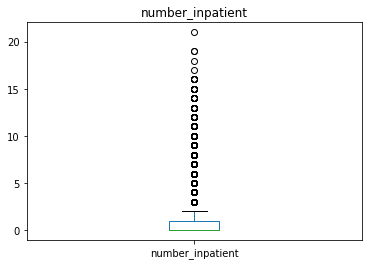

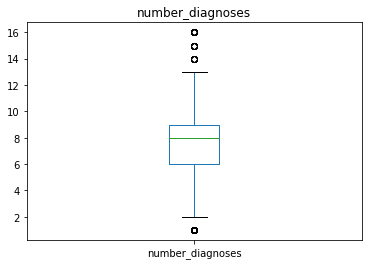

In [43]:
plot_boxplot(num_features, 'num_procedures')
plot_boxplot(num_features, 'patient_nbr')
plot_boxplot(num_features, 'age')
plot_boxplot(num_features, 'time_in_hospital')
plot_boxplot(num_features, 'num_lab_procedures')
plot_boxplot(num_features, 'num_medications')
plot_boxplot(num_features, 'number_outpatient')
plot_boxplot(num_features, 'number_emergency')
plot_boxplot(num_features, 'number_inpatient')
plot_boxplot(num_features, 'number_diagnoses')

Detecting outliers using Z score

In [44]:

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return outliers

In [45]:
out_num_proced=detect_outliers(num_features.num_procedures)
out_age=detect_outliers(num_features.age)
out_patient_nbr=detect_outliers(num_features.patient_nbr)
out_time_in_hospital=detect_outliers(num_features.time_in_hospital)
out_num_lab_procedures=detect_outliers(num_features.num_lab_procedures)
out_num_medications=detect_outliers(num_features.num_medications)
out_number_outpatient=detect_outliers(num_features.number_outpatient)
out_number_emergency=detect_outliers(num_features.number_emergency)
out_number_inpatient=detect_outliers(num_features.number_inpatient)
out_number_diagnoses=detect_outliers(num_features.number_diagnoses)

In [46]:
print("age",len(out_age))
print("patient_nbr",len(out_patient_nbr))
print("time_in_hospital",len(out_time_in_hospital))
print("num_lab_procedures",len(out_num_lab_procedures))
print("num_medications",len(out_num_medications))
print("number_outpatient",len(out_number_outpatient))
print("number_emergency",len(out_number_emergency))
print("number_inpatient",len(out_number_inpatient))
print("number_diagnoses",len(out_number_diagnoses))
print("num_procedures",len(out_num_proced))

age 842
patient_nbr 833
time_in_hospital 1018
num_lab_procedures 43
num_medications 1316
number_outpatient 1444
number_emergency 939
number_inpatient 2010
number_diagnoses 269
num_procedures 0


Number of Outliers in numeric columns
1. age 842
2. patient_nbr 833
3. time_in_hospital 1018
4. num_lab_procedures 43
5. num_medications 1316
6. number_outpatient 1444
7. number_emergency 939
8. number_inpatient 2010
9. number_diagnoses 269
10. num_procedures 0

Removing Outliers Using IQR

In [47]:
#IQR= Q3-Q1
# +/- 1.5*IQR
def outliers(df,feat):
    Q1=df[feat].quantile(0.25)
    Q3=df[feat].quantile(0.75)
    IQR= Q3 - Q1
    
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    
    #Creating a list of the indices having outliers
    ls=df.index[(df[feat] < lower_bound)| (df[feat] > upper_bound)]
    
    return ls

In [48]:
# Creating an emplty list to store the output indices from multiple columns

index_list=[]
for feature in ['patient_nbr','age','time_in_hospital','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']:
    index_list.extend(outliers(num_features,feature))

In [49]:
index_list

[90273,
 90300,
 90339,
 90388,
 90392,
 90404,
 90496,
 90509,
 90565,
 90566,
 90575,
 90626,
 90662,
 90717,
 90726,
 90842,
 90874,
 90933,
 90935,
 90965,
 91187,
 91282,
 91369,
 91404,
 91417,
 91449,
 91507,
 91532,
 91745,
 91774,
 91777,
 91793,
 91859,
 91912,
 91913,
 91979,
 92128,
 92165,
 92170,
 92196,
 92250,
 92361,
 92383,
 92475,
 92548,
 92553,
 92612,
 92745,
 92822,
 93050,
 93052,
 93095,
 93108,
 93250,
 93359,
 93582,
 93651,
 93664,
 93727,
 93742,
 93773,
 93796,
 93799,
 93849,
 93987,
 94022,
 94065,
 94078,
 94079,
 94081,
 94175,
 94183,
 94231,
 94252,
 94284,
 94361,
 94375,
 94413,
 94533,
 94654,
 94661,
 94711,
 94831,
 94896,
 94949,
 94976,
 95032,
 95074,
 95198,
 95218,
 95229,
 95263,
 95282,
 95283,
 95423,
 95457,
 95584,
 95599,
 95640,
 95650,
 95669,
 95723,
 95783,
 95975,
 96047,
 96119,
 96147,
 96176,
 96189,
 96251,
 96274,
 96345,
 96383,
 96479,
 96587,
 96668,
 96795,
 96863,
 96871,
 96883,
 96960,
 97002,
 97060,
 97061,
 97063,


In [50]:
# define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df,ls):
           ls=sorted(set(ls))
           df=df.drop(ls)
           return df

In [51]:
num_cleaned=remove(num_features,index_list)

In [52]:
num_cleaned

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,500364,82442376,35,2,44,1,16,0,0,0,7,1,0
4,16680,42519267,45,1,51,0,8,0,0,0,5,1,0
5,35754,82637451,55,3,31,6,16,0,0,0,9,1,1
6,55842,84259809,65,4,70,1,21,0,0,0,7,1,0
7,63768,114882984,75,5,73,0,12,0,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,443842136,181593374,75,5,21,1,16,0,0,1,9,1,0
101761,443847548,100162476,75,3,51,0,16,0,0,0,9,1,1
101762,443847782,74694222,85,5,33,3,18,0,0,1,9,1,0
101764,443857166,31693671,85,10,45,2,21,0,0,1,9,1,0


In [53]:
num_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67799 entries, 3 to 101765
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   encounter_id        67799 non-null  int64
 1   patient_nbr         67799 non-null  int64
 2   age                 67799 non-null  int64
 3   time_in_hospital    67799 non-null  int64
 4   num_lab_procedures  67799 non-null  int64
 5   num_procedures      67799 non-null  int64
 6   num_medications     67799 non-null  int64
 7   number_outpatient   67799 non-null  int64
 8   number_emergency    67799 non-null  int64
 9   number_inpatient    67799 non-null  int64
 10  number_diagnoses    67799 non-null  int64
 11  diabetesMed         67799 non-null  int64
 12  readmitted          67799 non-null  int64
dtypes: int64(13)
memory usage: 7.2 MB


### H. Removing duplicates in the column patient_nbr and show the shape of the resulting dataframe.

In [54]:
num_cleaned.patient_nbr.duplicated().sum()

13766

In [55]:
num_cleaned['patient_nbr']=num_cleaned['patient_nbr'].drop_duplicates()

In [56]:
print(num_cleaned.shape)
print(cat_feature.shape)

(67799, 13)
(99493, 6)


creating a clean dataset considering clean numeric features combining with categorical features

In [57]:
clean_df=num_cleaned.join(cat_feature)

In [58]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67799 entries, 3 to 101765
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encounter_id        67799 non-null  int64  
 1   patient_nbr         54033 non-null  float64
 2   age                 67799 non-null  int64  
 3   time_in_hospital    67799 non-null  int64  
 4   num_lab_procedures  67799 non-null  int64  
 5   num_procedures      67799 non-null  int64  
 6   num_medications     67799 non-null  int64  
 7   number_outpatient   67799 non-null  int64  
 8   number_emergency    67799 non-null  int64  
 9   number_inpatient    67799 non-null  int64  
 10  number_diagnoses    67799 non-null  int64  
 11  diabetesMed         67799 non-null  int64  
 12  readmitted          67799 non-null  int64  
 13  race                67799 non-null  object 
 14  gender              67799 non-null  object 
 15  diag_1              67799 non-null  object 
 16  dia

Shape of Resulting Dataset after cleaning

In [59]:
clean_df.shape

(67799, 19)

Reading the "icd_codes.csv" and adding it for further analysis

In [60]:
icd_codes=pd.read_csv("icd_codes.csv")

In [61]:
clean_df=clean_df.join(icd_codes)

In [62]:
clean_df

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted,race,gender,diag_1,diag_2,diag_3,change,ICD_Code,Description
3,500364,82442376.0,35,2,44,1,16,0,0,0,7,1,0,Caucasian,Male,8,250.43,403,Ch,3,Other Salmonella infections
4,16680,42519267.0,45,1,51,0,8,0,0,0,5,1,0,Caucasian,Male,197,157,250,Ch,4,Shigellosis
5,35754,82637451.0,55,3,31,6,16,0,0,0,9,1,1,Caucasian,Male,414,411,250,0,5,Other food poisoning (bacterial)
6,55842,84259809.0,65,4,70,1,21,0,0,0,7,1,0,Caucasian,Male,414,411,V45,Ch,6,Amoebiasis
7,63768,114882984.0,75,5,73,0,12,0,0,0,8,1,1,Caucasian,Male,428,492,250,0,7,Other protozoal intestinal diseases
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,443842136,NaN,75,5,21,1,16,0,0,1,9,1,0,Caucasian,Female,491,518,511,0,NaN,NaN
101761,443847548,NaN,75,3,51,0,16,0,0,0,9,1,1,AfricanAmerican,Male,250.13,291,458,Ch,NaN,NaN
101762,443847782,NaN,85,5,33,3,18,0,0,1,9,1,0,AfricanAmerican,Female,560,276,787,0,NaN,NaN
101764,443857166,NaN,85,10,45,2,21,0,0,1,9,1,0,Caucasian,Female,996,285,998,Ch,NaN,NaN


# 2. Data Exploration

### 1. Age has a higher impact on readmission.

Using CountPlot to show the impact of age on readmission

<AxesSubplot:xlabel='age', ylabel='count'>

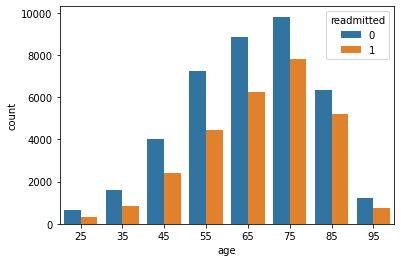

In [63]:
sns.countplot(data=clean_df,x='age',hue='readmitted')

Observation:
1. As the age increases, the chances of getting readmitted increases.

### 2. African Americans are more likely to be re-admitted than other ethnic groups

Comparision of race feature using PieChart

In [64]:
clean_df.race.value_counts()

Caucasian          51472
AfricanAmerican    13379
Hispanic            1435
Other               1031
Asian                482
Name: race, dtype: int64

([<matplotlib.patches.Wedge at 0x19106ef3fa0>,
 [Text(-1.5998709668259563, 1.5101036022430314, 'Caucasian'),
  Text(1.379326740679511, -1.713901322260543, 'AfricanAmerican'),
  Text(2.153165809246519, -0.4515274054714542, 'Other'),
  Text(2.1906066257110517, -0.20308276980295945, 'Asian'),
  Text(2.1994513203983517, -0.04913134638851288, 'Hispanic')],
 [Text(-0.8726568909959761, 0.8236928739507444, '75.92%'),
  Text(0.7523600403706423, -0.9348552666875688, '19.73%'),
  Text(1.1744540777708286, -0.24628767571170224, '2.12%'),
  Text(1.194876341296937, -0.11077241989252332, '1.52%'),
  Text(1.1997007202172827, -0.026798916211916112, '0.71%')])

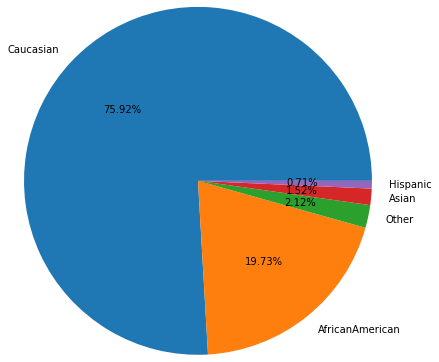

In [65]:
plt.pie(data=clean_df,x=clean_df.race.value_counts(), labels=clean_df.race.unique(),radius=2,autopct='%1.2f%%')

Plotting the readmission rate according to the race using CountPlot

<AxesSubplot:xlabel='race', ylabel='count'>

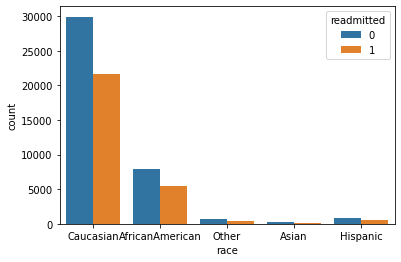

In [66]:
sns.countplot(data=clean_df,x=clean_df.race, hue=clean_df.readmitted)

Observation:
1. African Americans are more likely to be re-admitted than other ethnic groups as their readmission rate

### 3. Women patients are more likely to be re-admitted than men.

Getting the readmission of patients according to the gender using CountPlot.

<AxesSubplot:xlabel='gender', ylabel='count'>

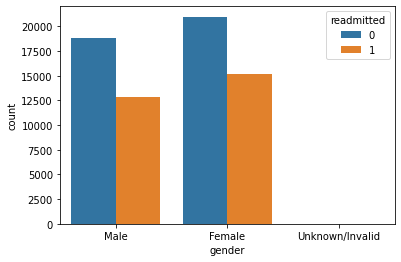

In [67]:
sns.countplot(data=clean_df, x='gender',hue='readmitted')

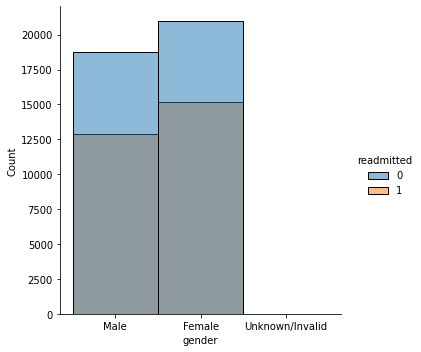

In [68]:
sns.displot(data=clean_df,x='gender', hue='readmitted')

Observation:
1. Women patients are more likely to be re-admitted than men.

### 4. Diagnose types have a higher impact on re-admission rates.

Observation:
1. As Diagnose types i.e. diag_1, diag_2, diag_3 are 'object' data type columns and contains a huge numbers of values.
2. Therefore, they can't be plotted against readmitted feature

# 3. Model Building

Separating Independent "x" and Dependent "y" Variable

In [69]:
clean_df.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted,race,gender,diag_1,diag_2,diag_3,change,ICD_Code,Description
3,500364,82442376.0,35,2,44,1,16,0,0,0,7,1,0,Caucasian,Male,8,250.43,403,Ch,3,Other Salmonella infections
4,16680,42519267.0,45,1,51,0,8,0,0,0,5,1,0,Caucasian,Male,197,157,250,Ch,4,Shigellosis
5,35754,82637451.0,55,3,31,6,16,0,0,0,9,1,1,Caucasian,Male,414,411,250,0,5,Other food poisoning (bacterial)
6,55842,84259809.0,65,4,70,1,21,0,0,0,7,1,0,Caucasian,Male,414,411,V45,Ch,6,Amoebiasis
7,63768,114882984.0,75,5,73,0,12,0,0,0,8,1,1,Caucasian,Male,428,492,250,0,7,Other protozoal intestinal diseases


In [70]:
indep_var=['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital',
'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses',
'num_procedures']

In [71]:
dep_var=['readmitted']

In [72]:
x=clean_df[indep_var]
y=clean_df[dep_var]

In [73]:
x.head()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures
3,16,0,0,2,0,500364,35,44,7,1
4,8,0,0,1,0,16680,45,51,5,0
5,16,0,0,3,0,35754,55,31,9,6
6,21,0,0,4,0,55842,65,70,7,1
7,12,0,0,5,0,63768,75,73,8,0


In [74]:
y.head()

,readmitted
3,0
4,0
5,1
6,0
7,1


Train Test Splitting the data Using Sklearn

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54239 entries, 39424 to 20252
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_medications     54239 non-null  int64
 1   number_outpatient   54239 non-null  int64
 2   number_emergency    54239 non-null  int64
 3   time_in_hospital    54239 non-null  int64
 4   number_inpatient    54239 non-null  int64
 5   encounter_id        54239 non-null  int64
 6   age                 54239 non-null  int64
 7   num_lab_procedures  54239 non-null  int64
 8   number_diagnoses    54239 non-null  int64
 9   num_procedures      54239 non-null  int64
dtypes: int64(10)
memory usage: 4.6 MB


In [78]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54239 entries, 39424 to 20252
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   readmitted  54239 non-null  int64
dtypes: int64(1)
memory usage: 847.5 KB


Building a Random Forest Classifier for the prediction

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model=RandomForestClassifier()

In [81]:
model.fit(x_train,y_train)

C:\Users\sarth\AppData\Local\Temp/ipykernel_12736/1002171229.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [82]:
y_pred=model.predict(x_test)

In [83]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Using the confusion matrix to see the accuracy of the model

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
results=confusion_matrix(y_test,y_pred)
results

array([[6087, 1912],
       [3393, 2168]], dtype=int64)

Observation:
1. Seeing the Confusion Matrix, we conclude that there are many values that are classified/predicted wrong.

Using Several Cross Validation Methods such as:
1. Accuracy
2. Precision
3. Recall
4. F1 score

In [86]:
from sklearn.metrics import classification_report 

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      7999
           1       0.53      0.39      0.45      5561

    accuracy                           0.61     13560
   macro avg       0.59      0.58      0.57     13560
weighted avg       0.60      0.61      0.60     13560



Observation:-
1. By Seeing this classification Report, we can conclude that the model did not predicted well with the testing data. 
2. By providing the accuracy of 61% approx.

# Part 2- Improved Model

## Clustering Using K-Means Clustering

In [88]:
clean_df.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted,race,gender,diag_1,diag_2,diag_3,change,ICD_Code,Description
3,500364,82442376.0,35,2,44,1,16,0,0,0,7,1,0,Caucasian,Male,8,250.43,403,Ch,3,Other Salmonella infections
4,16680,42519267.0,45,1,51,0,8,0,0,0,5,1,0,Caucasian,Male,197,157,250,Ch,4,Shigellosis
5,35754,82637451.0,55,3,31,6,16,0,0,0,9,1,1,Caucasian,Male,414,411,250,0,5,Other food poisoning (bacterial)
6,55842,84259809.0,65,4,70,1,21,0,0,0,7,1,0,Caucasian,Male,414,411,V45,Ch,6,Amoebiasis
7,63768,114882984.0,75,5,73,0,12,0,0,0,8,1,1,Caucasian,Male,428,492,250,0,7,Other protozoal intestinal diseases


In [89]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67799 entries, 3 to 101765
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   encounter_id        67799 non-null  int64  
 1   patient_nbr         54033 non-null  float64
 2   age                 67799 non-null  int64  
 3   time_in_hospital    67799 non-null  int64  
 4   num_lab_procedures  67799 non-null  int64  
 5   num_procedures      67799 non-null  int64  
 6   num_medications     67799 non-null  int64  
 7   number_outpatient   67799 non-null  int64  
 8   number_emergency    67799 non-null  int64  
 9   number_inpatient    67799 non-null  int64  
 10  number_diagnoses    67799 non-null  int64  
 11  diabetesMed         67799 non-null  int64  
 12  readmitted          67799 non-null  int64  
 13  race                67799 non-null  object 
 14  gender              67799 non-null  object 
 15  diag_1              67799 non-null  object 
 16  dia

In [90]:
clean_df=clean_df[['age','num_lab_procedures']]

In [91]:
clean_df

,age,num_lab_procedures
3,35,44
4,45,51
5,55,31
6,65,70
7,75,73
...,...,...
101757,75,21
101761,75,51
101762,85,33
101764,85,45


In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()
scaler.fit(clean_df)
clean_df=scaler.transform(clean_df)

In [94]:
clean_df=pd.DataFrame(clean_df)

In [95]:
clean_df['age']=clean_df[0]
clean_df['num_lab_procedures']=clean_df[1]

In [97]:
clean_df.drop(0, axis=1,inplace=True)
clean_df.drop(1,axis=1,inplace=True)

In [98]:
clean_df

,age,num_lab_procedures
0,0.142857,0.452632
1,0.285714,0.526316
2,0.428571,0.315789
3,0.571429,0.726316
4,0.714286,0.757895
...,...,...
67794,0.714286,0.210526
67795,0.714286,0.526316
67796,0.857143,0.336842
67797,0.857143,0.463158


In [99]:
sse=[]
for k in range(2,10):
    k_mean=KMeans(n_clusters=k,random_state=42)
    k_mean.fit(clean_df)
    sse.append(k_mean.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
sse

[3800.746909332639,
 2479.151008811981,
 2009.4538591724781,
 1649.621639264775,
 1349.6158268333597,
 1115.1739346939064,
 1008.8227303598127,
 890.4570108215406]

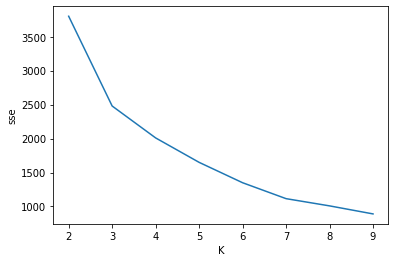

In [101]:
plt.xlabel("K")
plt.ylabel("sse")
plt.plot(range(2,10),sse)

In [102]:
km=KMeans(n_clusters=4)
km

<IPython.core.display.Javascript object>

KMeans(n_clusters=4)

In [103]:
y_pred=km.fit_predict(clean_df)
y_pred

array([0, 0, 0, ..., 3, 3, 2])

In [108]:
clean_df['cluster']=y_pred

In [109]:
clean_df.head()

,age,num_lab_procedures,cluster
0,0.142857,0.452632,0
1,0.285714,0.526316,0
2,0.428571,0.315789,0
3,0.571429,0.726316,1
4,0.714286,0.757895,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


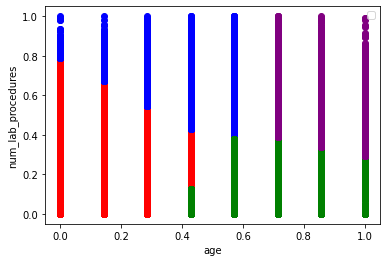

In [110]:
df1=clean_df[clean_df.cluster==0]
df2=clean_df[clean_df.cluster==1]
df3=clean_df[clean_df.cluster==2]
df4=clean_df[clean_df.cluster==3]

plt.scatter(df1.age,df1.num_lab_procedures,color='red')
plt.scatter(df2.age,df2.num_lab_procedures,color='blue')
plt.scatter(df3.age,df3.num_lab_procedures,color='green')
plt.scatter(df4.age,df4.num_lab_procedures,color='purple')

plt.xlabel('age')
plt.ylabel('num_lab_procedures')
plt.legend()

Observation:
1. This dataset is unsuitable for k-means clustering algorithm.